🚀 Memulai analisis lengkap Apple Quality Dataset...
📁 Memuat dataset...
✅ Dataset berhasil dimuat dengan shape: (4001, 9)
📋 Kolom dataset: ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']

🔍 EKSPLORASI DATA AWAL
📊 Shape dataset: (4001, 9)
📈 Jumlah baris: 4001
📉 Jumlah kolom: 9

📋 Informasi Tipe Data:
A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

🔍 Missing Values:
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Quality        1
dtype: int64

📊 Statistik Deskriptif Dasar:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std

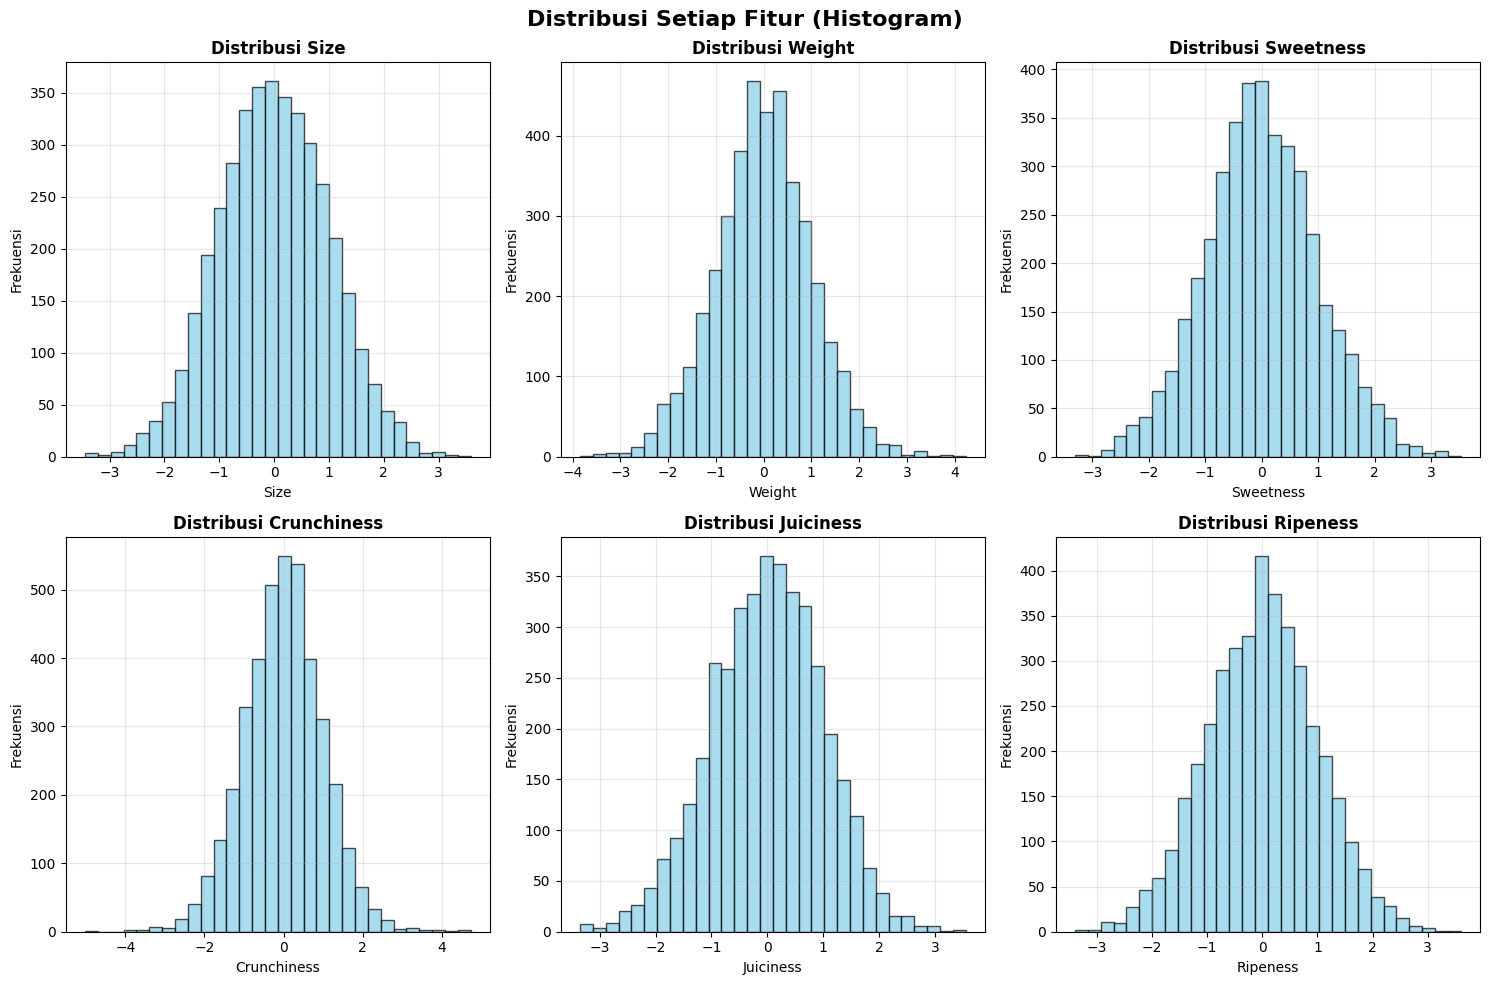

📦 Membuat boxplot...


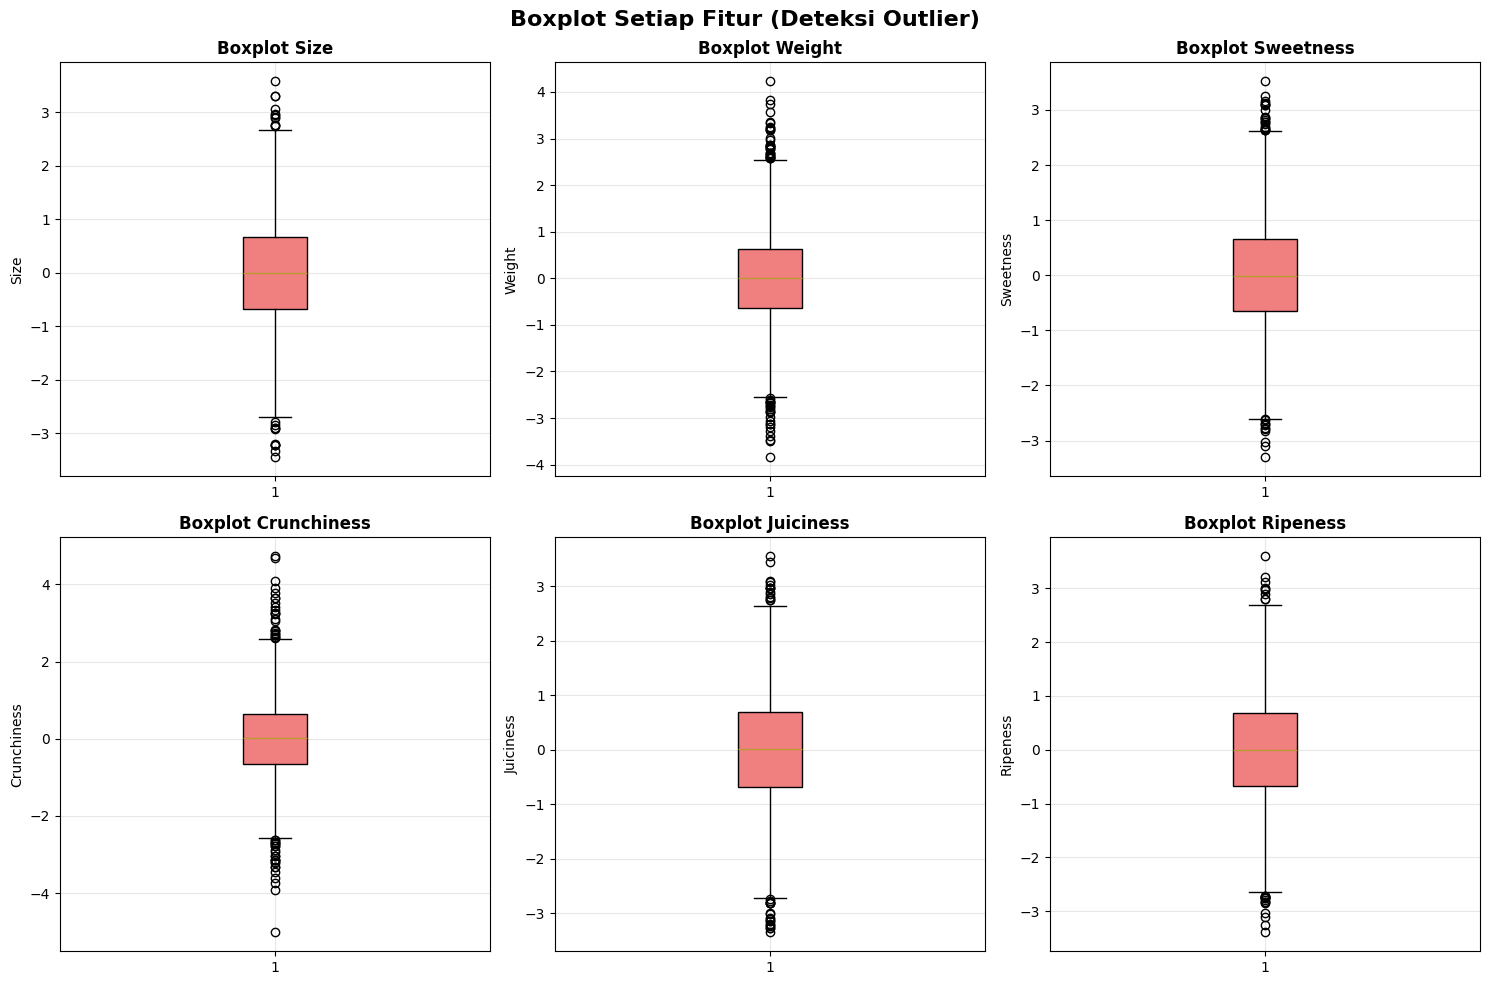

🔥 Membuat heatmap korelasi...


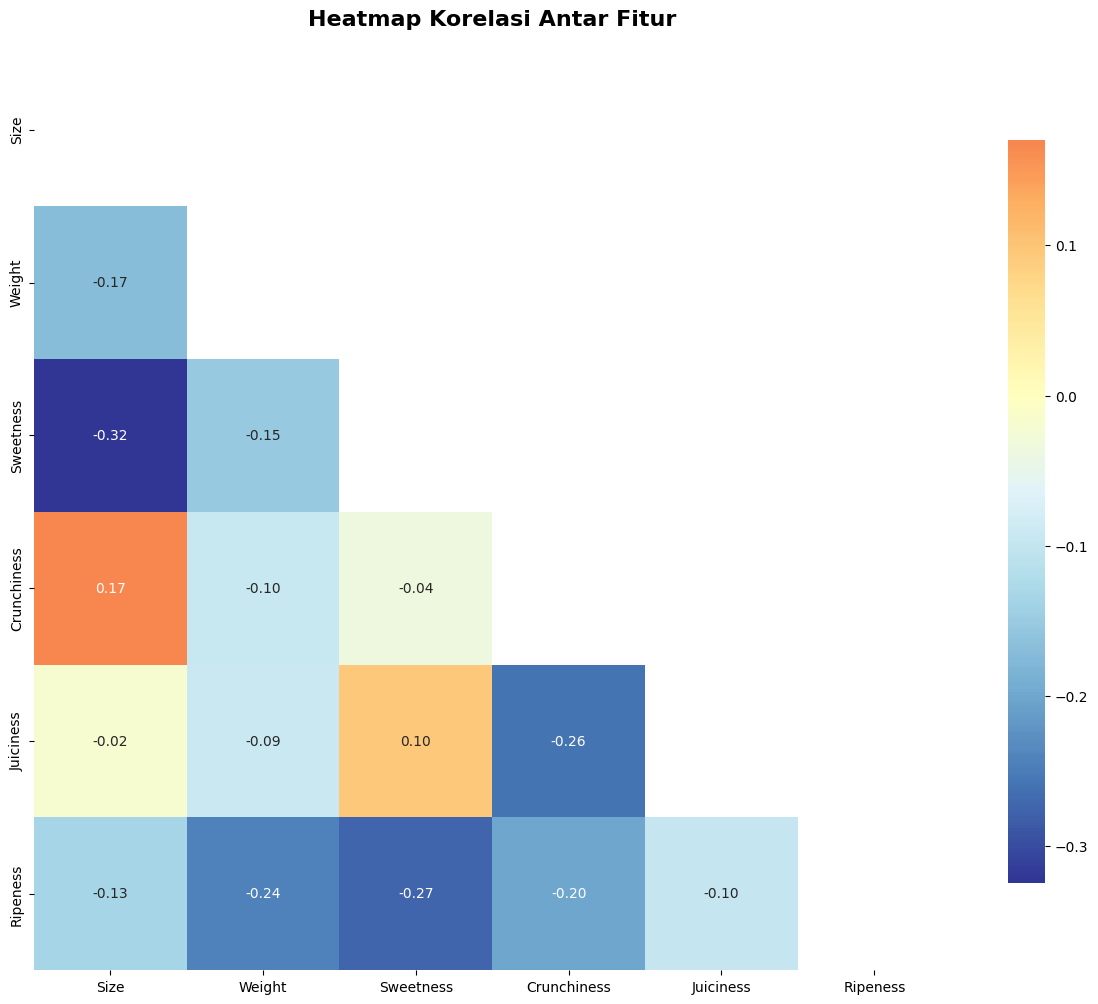

🎯 Membuat pairplot...


<Figure size 1500x1200 with 0 Axes>

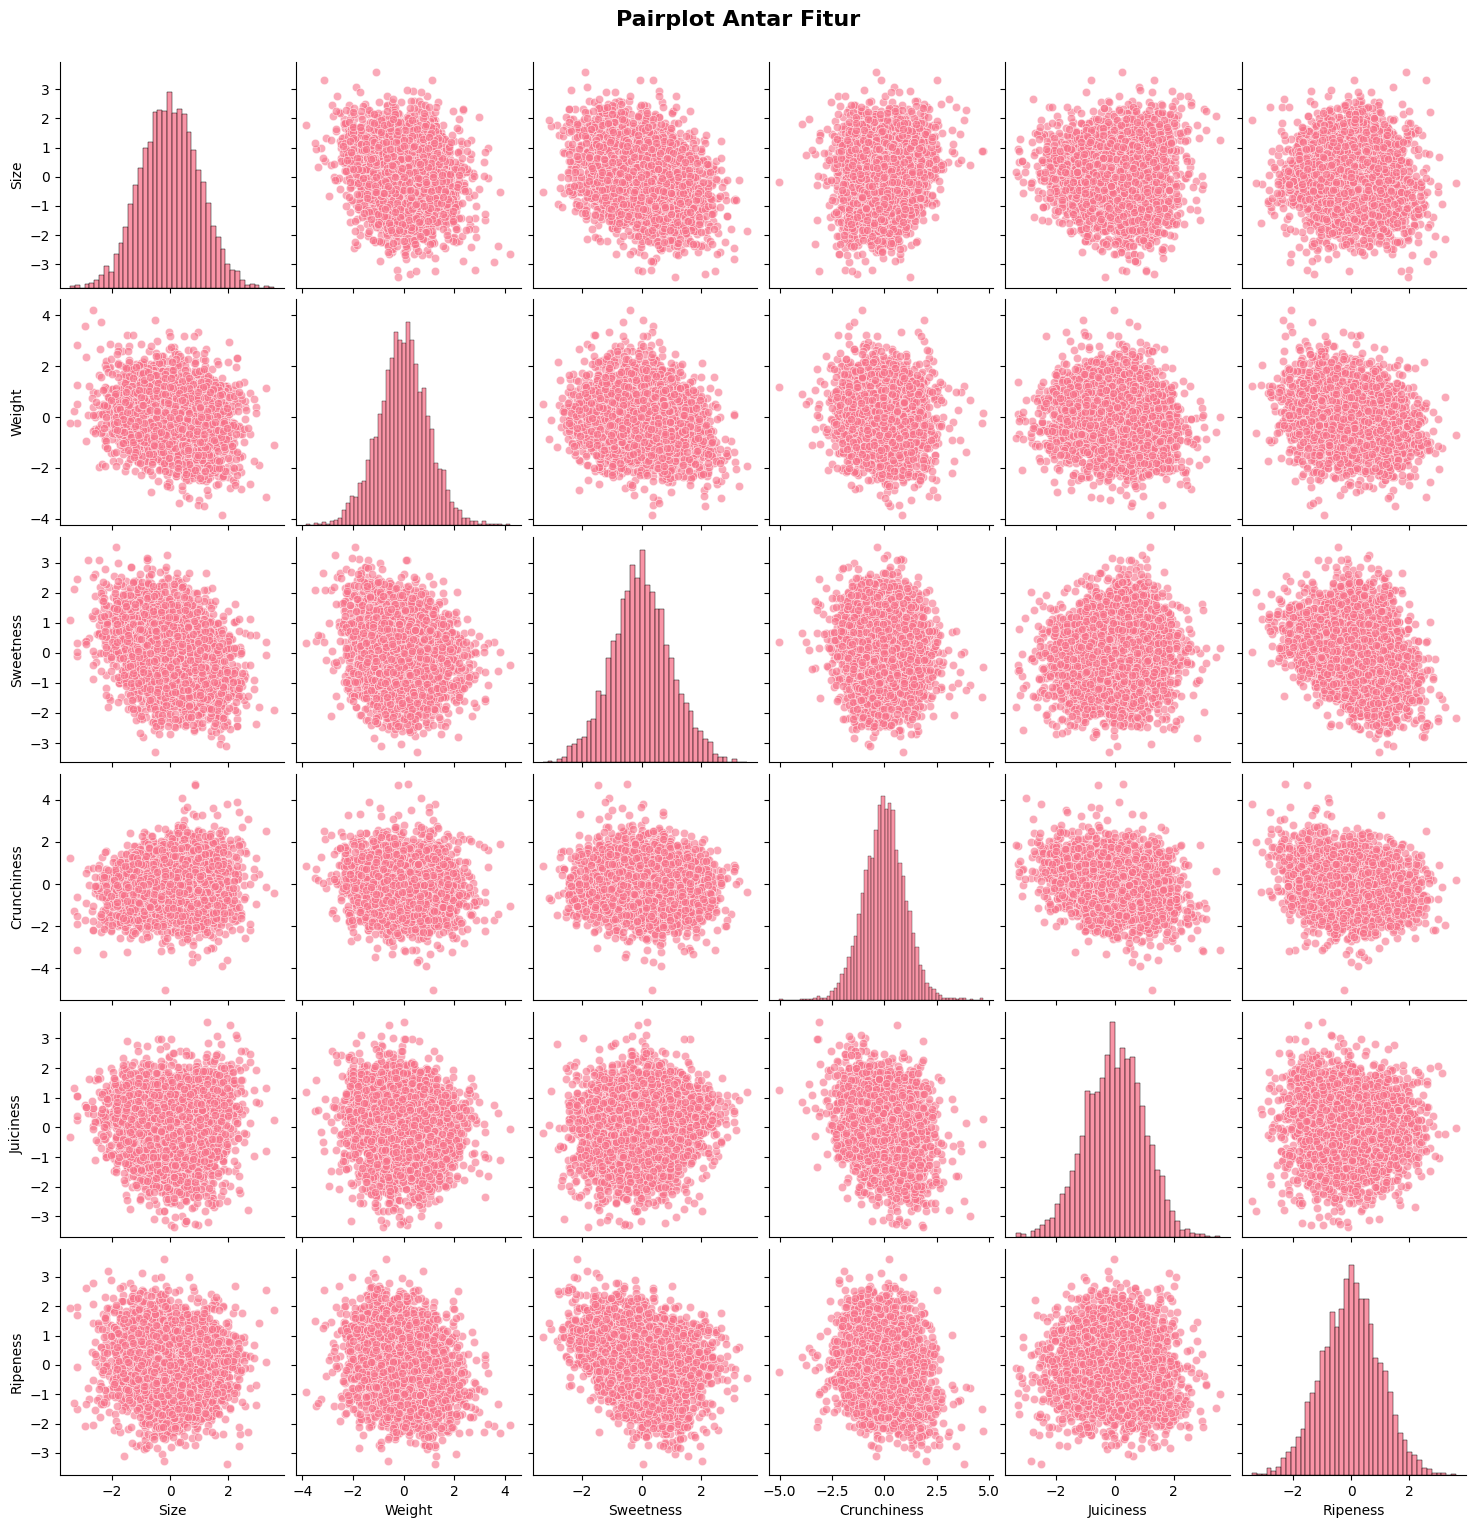

✅ Semua visualisasi telah dibuat!

📋 LAPORAN RINGKASAN ANALISIS
📊 INFORMASI DATASET:
  • Jumlah sampel: 4,001
  • Jumlah fitur: 8
  • Fitur numerik: 6

📈 STATISTIK DESKRIPTIF:
  • Rata-rata variabilitas (std): 1.000
  • Fitur dengan variabilitas tertinggi: Weight (1.000)
  • Fitur dengan variabilitas terendah: Size (1.000)

💡 REKOMENDASI:
  • Data telah siap untuk modeling machine learning
  • Fitur telah dinormalisasi/distandarisasi
  • Perhatikan fitur dengan korelasi tinggi untuk feature selection
  • Pertimbangkan feature engineering untuk meningkatkan performa model

✅ Analisis selesai!

💾 Data yang telah diproses disimpan sebagai 'apel_quality_processed.csv'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

class AppleQualityAnalyzer:
    """
    Kelas untuk analisis dataset kualitas apel
    """
    
    def __init__(self, file_path='appel_quality.csv'):
        """
        Inisialisasi dengan path file dataset
        
        Args:
            file_path (str): Path ke file CSV dataset
        """
        self.file_path = file_path
        self.raw_data = None
        self.processed_data = None
        self.scaler = None
        
    def load_data(self):
        """
        Membaca dataset dari file CSV
        
        Returns:
            pd.DataFrame: Dataset yang telah dimuat
        """
        try:
            print("📁 Memuat dataset...")
            self.raw_data = pd.read_csv(self.file_path)
            print(f"✅ Dataset berhasil dimuat dengan shape: {self.raw_data.shape}")
            print(f"📋 Kolom dataset: {list(self.raw_data.columns)}")
            return self.raw_data
        except FileNotFoundError:
            print(f"❌ Error: File '{self.file_path}' tidak ditemukan!")
            return None
        except Exception as e:
            print(f"❌ Error saat memuat data: {str(e)}")
            return None
    
    def explore_data(self):
        """
        Eksplorasi awal dataset
        """
        if self.raw_data is None:
            print("❌ Data belum dimuat!")
            return
        
        print("\n" + "="*50)
        print("🔍 EKSPLORASI DATA AWAL")
        print("="*50)
        
        # Info dasar dataset
        print(f"📊 Shape dataset: {self.raw_data.shape}")
        print(f"📈 Jumlah baris: {self.raw_data.shape[0]}")
        print(f"📉 Jumlah kolom: {self.raw_data.shape[1]}")
        
        # Info tipe data
        print("\n📋 Informasi Tipe Data:")
        print(self.raw_data.dtypes)
        
        # Cek missing values
        print("\n🔍 Missing Values:")
        missing_values = self.raw_data.isnull().sum()
        if missing_values.sum() == 0:
            print("✅ Tidak ada missing values")
        else:
            print(missing_values[missing_values > 0])
        
        # Statistik deskriptif dasar
        print("\n📊 Statistik Deskriptif Dasar:")
        print(self.raw_data.describe())
        
        # Preview data
        print("\n👀 Preview Data (5 baris pertama):")
        print(self.raw_data.head())
        
    def preprocess_data(self, remove_outliers=False, scaling_method='standard'):
        """
        Preprocessing data
        
        Args:
            remove_outliers (bool): Apakah menghapus outliers
            scaling_method (str): Metode scaling ('standard' atau 'minmax')
        
        Returns:
            pd.DataFrame: Data yang telah diproses
        """
        if self.raw_data is None:
            print("❌ Data belum dimuat!")
            return None
        
        print("\n" + "="*50)
        print("🔧 PREPROCESSING DATA")
        print("="*50)
        
        # Copy data untuk preprocessing
        self.processed_data = self.raw_data.copy()
        
        # 1. Hapus kolom A_id
        if 'A_id' in self.processed_data.columns:
            self.processed_data = self.processed_data.drop('A_id', axis=1)
            print("✅ Kolom 'A_id' telah dihapus")
        
        # 2. Handle missing values
        missing_before = self.processed_data.isnull().sum().sum()
        if missing_before > 0:
            print(f"🔍 Ditemukan {missing_before} missing values")
            # Imputasi dengan median untuk fitur numerik
            numeric_columns = self.processed_data.select_dtypes(include=[np.number]).columns
            for col in numeric_columns:
                if self.processed_data[col].isnull().sum() > 0:
                    median_val = self.processed_data[col].median()
                    self.processed_data[col].fillna(median_val, inplace=True)
                    print(f"  - Kolom '{col}': diimputasi dengan median ({median_val:.2f})")
        else:
            print("✅ Tidak ada missing values")
        
        # 3. Convert data types jika diperlukan
        print("\n🔄 Mengecek dan mengubah tipe data...")
        for col in self.processed_data.columns:
            if col != 'Quality':  # Asumsikan Quality adalah target variable
                try:
                    self.processed_data[col] = pd.to_numeric(self.processed_data[col])
                except:
                    print(f"⚠️  Kolom '{col}' tidak dapat diubah ke numerik")
        
        # 4. Handle outliers (opsional)
        if remove_outliers:
            print("\n🎯 Menghapus outliers menggunakan metode IQR...")
            initial_shape = self.processed_data.shape[0]
            numeric_cols = self.processed_data.select_dtypes(include=[np.number]).columns
            
            for col in numeric_cols:
                if col != 'Quality':  # Jangan hapus outliers dari target variable
                    Q1 = self.processed_data[col].quantile(0.25)
                    Q3 = self.processed_data[col].quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    
                    outliers_mask = (self.processed_data[col] < lower_bound) | (self.processed_data[col] > upper_bound)
                    outliers_count = outliers_mask.sum()
                    
                    if outliers_count > 0:
                        print(f"  - {col}: {outliers_count} outliers ditemukan")
            
            # Hapus baris yang mengandung outliers
            for col in numeric_cols:
                if col != 'Quality':
                    Q1 = self.processed_data[col].quantile(0.25)
                    Q3 = self.processed_data[col].quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    
                    self.processed_data = self.processed_data[
                        (self.processed_data[col] >= lower_bound) & 
                        (self.processed_data[col] <= upper_bound)
                    ]
            
            final_shape = self.processed_data.shape[0]
            print(f"  📊 Baris sebelum: {initial_shape}, setelah: {final_shape}")
            print(f"  📉 {initial_shape - final_shape} baris dihapus ({((initial_shape - final_shape)/initial_shape)*100:.1f}%)")
        
        # 5. Scaling/Normalisasi fitur numerik
        print(f"\n📏 Melakukan {scaling_method} scaling...")
        numeric_features = self.processed_data.select_dtypes(include=[np.number]).columns.tolist()
        
        # Exclude target variable dari scaling
        if 'Quality' in numeric_features:
            features_to_scale = [col for col in numeric_features if col != 'Quality']
        else:
            features_to_scale = numeric_features
        
        if scaling_method == 'standard':
            self.scaler = StandardScaler()
        elif scaling_method == 'minmax':
            self.scaler = MinMaxScaler()
        else:
            print(f"⚠️  Metode scaling '{scaling_method}' tidak dikenal. Menggunakan StandardScaler.")
            self.scaler = StandardScaler()
        
        # Fit dan transform data
        scaled_features = self.scaler.fit_transform(self.processed_data[features_to_scale])
        
        # Update dataframe dengan fitur yang telah discaling
        for i, col in enumerate(features_to_scale):
            self.processed_data[col] = scaled_features[:, i]
        
        print(f"✅ {len(features_to_scale)} fitur telah discaling dengan {type(self.scaler).__name__}")
        
        print(f"\n📊 Shape data setelah preprocessing: {self.processed_data.shape}")
        return self.processed_data
    
    def descriptive_statistics(self):
        """
        Menghitung statistik deskriptif lengkap
        
        Returns:
            dict: Dictionary berisi statistik deskriptif
        """
        if self.processed_data is None:
            print("❌ Data belum diproses!")
            return None
        
        print("\n" + "="*50)
        print("📊 ANALISIS STATISTIK DESKRIPTIF")
        print("="*50)
        
        numeric_data = self.processed_data.select_dtypes(include=[np.number])
        stats_dict = {}
        
        for column in numeric_data.columns:
            data = numeric_data[column].dropna()
            
            # Hitung statistik dasar
            mean_val = data.mean()
            median_val = data.median()
            mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
            std_val = data.std()
            var_val = data.var()
            min_val = data.min()
            max_val = data.max()
            q1 = data.quantile(0.25)
            q3 = data.quantile(0.75)
            
            # Simpan ke dictionary
            stats_dict[column] = {
                'mean': mean_val,
                'median': median_val,
                'mode': mode_val,
                'std': std_val,
                'variance': var_val,
                'min': min_val,
                'max': max_val,
                'q1': q1,
                'q3': q3,
                'count': len(data)
            }
        
        # Tampilkan dalam format tabel
        stats_df = pd.DataFrame(stats_dict).T
        print("📋 STATISTIK DESKRIPTIF PER FITUR:")
        print("-" * 80)
        print(stats_df.round(4))
        
        return stats_dict
    
    def correlation_analysis(self):
        """
        Analisis korelasi antar fitur
        
        Returns:
            pd.DataFrame: Matriks korelasi
        """
        if self.processed_data is None:
            print("❌ Data belum diproses!")
            return None
        
        print("\n" + "="*50)
        print("🔗 ANALISIS KORELASI")
        print("="*50)
        
        # Hitung matriks korelasi
        numeric_data = self.processed_data.select_dtypes(include=[np.number])
        correlation_matrix = numeric_data.corr()
        
        print("📊 Matriks Korelasi:")
        print(correlation_matrix.round(3))
        
        # Korelasi dengan Quality (jika ada)
        if 'Quality' in correlation_matrix.columns:
            print("\n🎯 Korelasi dengan Quality (diurutkan):")
            quality_corr = correlation_matrix['Quality'].sort_values(key=abs, ascending=False)
            for feature, corr in quality_corr.items():
                if feature != 'Quality':
                    strength = self._interpret_correlation(abs(corr))
                    direction = "positif" if corr > 0 else "negatif"
                    print(f"  {feature:15s}: {corr:6.3f} ({direction}, {strength})")
        
        return correlation_matrix
    
    def _interpret_correlation(self, corr_value):
        """
        Interpretasi kekuatan korelasi
        
        Args:
            corr_value (float): Nilai absolut korelasi
            
        Returns:
            str: Interpretasi kekuatan korelasi
        """
        if corr_value >= 0.7:
            return "sangat kuat"
        elif corr_value >= 0.5:
            return "kuat"
        elif corr_value >= 0.3:
            return "sedang"
        elif corr_value >= 0.1:
            return "lemah"
        else:
            return "sangat lemah"
    
    def create_visualizations(self):
        """
        Membuat visualisasi data
        """
        if self.processed_data is None:
            print("❌ Data belum diproses!")
            return
        
        print("\n" + "="*50)
        print("📈 MEMBUAT VISUALISASI")
        print("="*50)
        
        numeric_data = self.processed_data.select_dtypes(include=[np.number])
        n_features = len(numeric_data.columns)
        
        # Set style seaborn
        plt.style.use('default')
        sns.set_palette("husl")
        
        # 1. Histogram untuk setiap fitur
        print("📊 Membuat histogram distribusi...")
        n_cols = 3
        n_rows = (n_features + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        fig.suptitle('Distribusi Setiap Fitur (Histogram)', fontsize=16, fontweight='bold')
        
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        
        for i, column in enumerate(numeric_data.columns):
            row = i // n_cols
            col = i % n_cols
            
            axes[row, col].hist(numeric_data[column].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[row, col].set_title(f'Distribusi {column}', fontweight='bold')
            axes[row, col].set_xlabel(column)
            axes[row, col].set_ylabel('Frekuensi')
            axes[row, col].grid(True, alpha=0.3)
        
        # Hide empty subplots
        for i in range(n_features, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # 2. Boxplot untuk setiap fitur
        print("📦 Membuat boxplot...")
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        fig.suptitle('Boxplot Setiap Fitur (Deteksi Outlier)', fontsize=16, fontweight='bold')
        
        if n_rows == 1:
            axes = axes.reshape(1, -1)
        
        for i, column in enumerate(numeric_data.columns):
            row = i // n_cols
            col = i % n_cols
            
            box_plot = axes[row, col].boxplot(numeric_data[column].dropna(), patch_artist=True)
            box_plot['boxes'][0].set_facecolor('lightcoral')
            axes[row, col].set_title(f'Boxplot {column}', fontweight='bold')
            axes[row, col].set_ylabel(column)
            axes[row, col].grid(True, alpha=0.3)
        
        # Hide empty subplots
        for i in range(n_features, n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            axes[row, col].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # 3. Heatmap korelasi
        print("🔥 Membuat heatmap korelasi...")
        plt.figure(figsize=(12, 10))
        correlation_matrix = numeric_data.corr()
        
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, 
                   mask=mask,
                   annot=True, 
                   cmap='RdYlBu_r', 
                   center=0,
                   square=True,
                   fmt='.2f',
                   cbar_kws={"shrink": .8})
        
        plt.title('Heatmap Korelasi Antar Fitur', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        # 4. Pairplot (jika jumlah fitur tidak terlalu banyak)
        if n_features <= 8:
            print("🎯 Membuat pairplot...")
            plt.figure(figsize=(15, 12))
            
            # Jika ada kolom Quality, gunakan sebagai hue
            hue_col = 'Quality' if 'Quality' in numeric_data.columns else None
            
            g = sns.pairplot(numeric_data, 
                           hue=hue_col,
                           diag_kind='hist',
                           plot_kws={'alpha': 0.6})
            
            g.fig.suptitle('Pairplot Antar Fitur', fontsize=16, fontweight='bold', y=1.02)
            plt.show()
        else:
            print("⚠️  Terlalu banyak fitur untuk pairplot, dilewati...")
        
        print("✅ Semua visualisasi telah dibuat!")
    
    def generate_summary_report(self):
        """
        Generate laporan ringkasan analisis
        """
        if self.processed_data is None:
            print("❌ Data belum diproses!")
            return
        
        print("\n" + "="*60)
        print("📋 LAPORAN RINGKASAN ANALISIS")
        print("="*60)
        
        # Informasi dataset
        print("📊 INFORMASI DATASET:")
        print(f"  • Jumlah sampel: {self.processed_data.shape[0]:,}")
        print(f"  • Jumlah fitur: {self.processed_data.shape[1]}")
        print(f"  • Fitur numerik: {len(self.processed_data.select_dtypes(include=[np.number]).columns)}")
        
        # Statistik deskriptif ringkas
        numeric_data = self.processed_data.select_dtypes(include=[np.number])
        print(f"\n📈 STATISTIK DESKRIPTIF:")
        print(f"  • Rata-rata variabilitas (std): {numeric_data.std().mean():.3f}")
        print(f"  • Fitur dengan variabilitas tertinggi: {numeric_data.std().idxmax()} ({numeric_data.std().max():.3f})")
        print(f"  • Fitur dengan variabilitas terendah: {numeric_data.std().idxmin()} ({numeric_data.std().min():.3f})")
        
        # Korelasi dengan Quality
        if 'Quality' in numeric_data.columns:
            corr_with_quality = numeric_data.corr()['Quality'].abs().sort_values(ascending=False)
            print(f"\n🎯 KORELASI DENGAN QUALITY:")
            print(f"  • Fitur paling berkorelasi: {corr_with_quality.index[1]} ({corr_with_quality.iloc[1]:.3f})")
            print(f"  • Fitur kurang berkorelasi: {corr_with_quality.index[-1]} ({corr_with_quality.iloc[-1]:.3f})")
        
        # Rekomendasi
        print(f"\n💡 REKOMENDASI:")
        print("  • Data telah siap untuk modeling machine learning")
        print("  • Fitur telah dinormalisasi/distandarisasi")
        print("  • Perhatikan fitur dengan korelasi tinggi untuk feature selection")
        print("  • Pertimbangkan feature engineering untuk meningkatkan performa model")
        
        print("\n✅ Analisis selesai!")
    
    def run_complete_analysis(self, remove_outliers=False, scaling_method='standard'):
        """
        Menjalankan analisis lengkap dari awal hingga akhir
        
        Args:
            remove_outliers (bool): Apakah menghapus outliers
            scaling_method (str): Metode scaling ('standard' atau 'minmax')
        """
        print("🚀 Memulai analisis lengkap Apple Quality Dataset...")
        print("="*60)
        
        # 1. Load data
        if self.load_data() is None:
            return
        
        # 2. Explore data
        self.explore_data()
        
        # 3. Preprocess data
        if self.preprocess_data(remove_outliers=remove_outliers, 
                              scaling_method=scaling_method) is None:
            return
        
        # 4. Descriptive statistics
        self.descriptive_statistics()
        
        # 5. Correlation analysis
        self.correlation_analysis()
        
        # 6. Create visualizations
        self.create_visualizations()
        
        # 7. Generate summary report
        self.generate_summary_report()


def main():
    """
    Fungsi utama untuk menjalankan analisis
    """
    # Inisialisasi analyzer
    analyzer = AppleQualityAnalyzer('apple_quality.csv')
    
    # Jalankan analisis lengkap
    analyzer.run_complete_analysis(
        remove_outliers=False,  # Set True jika ingin menghapus outliers
        scaling_method='standard'  # 'standard' atau 'minmax'
    )
    
    # Simpan data yang telah diproses (opsional)
    if analyzer.processed_data is not None:
        analyzer.processed_data.to_csv('apple_quality_processed.csv', index=False)
        print(f"\n💾 Data yang telah diproses disimpan sebagai 'apel_quality_processed.csv'")


if __name__ == "__main__":
    main()

In [6]:
import os
print(os.listdir('.'))  # Tampilkan file di direktori saat ini

['.git', 'apple_quality.csv', 'KKApel.ipynb', 'KMEANSUDARAJAKARTA.ipynb', 'README.md', 'requirements.txt']


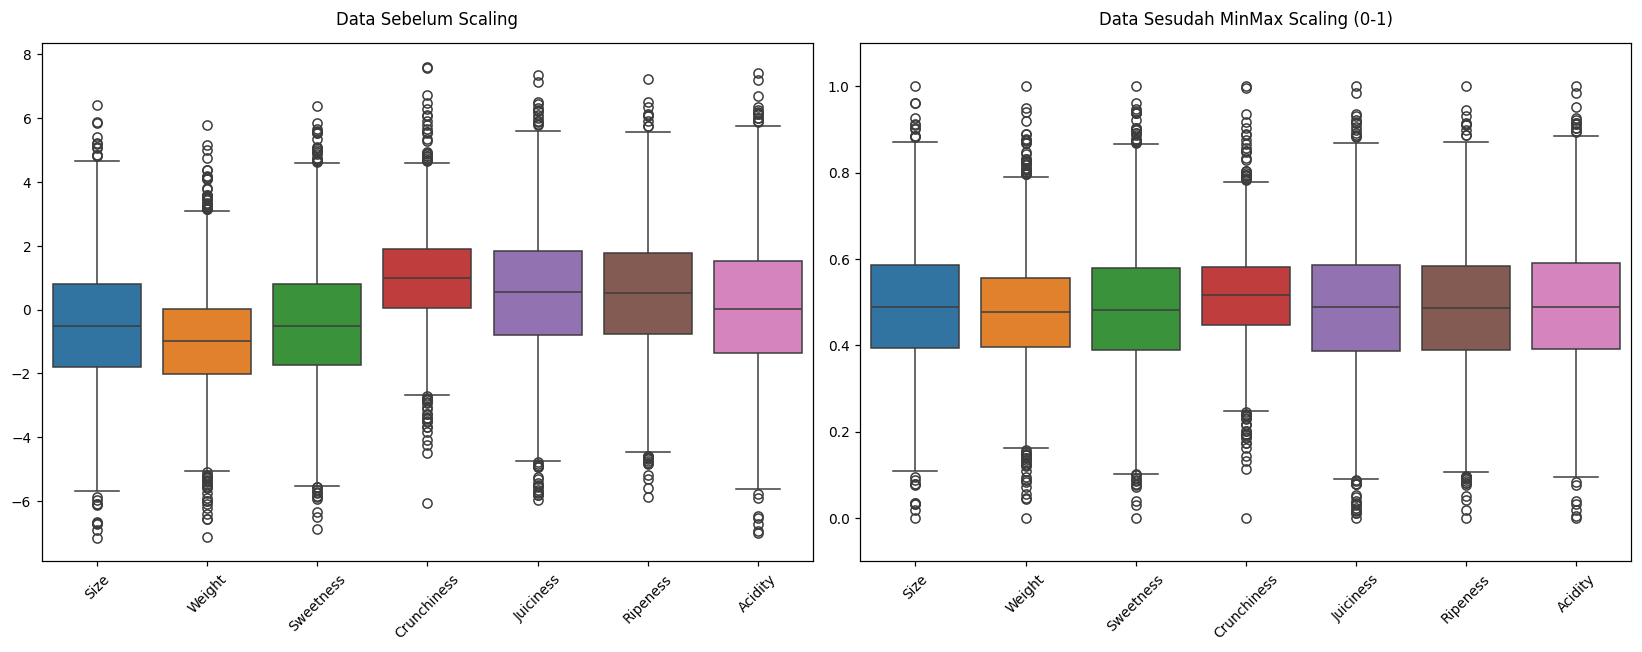

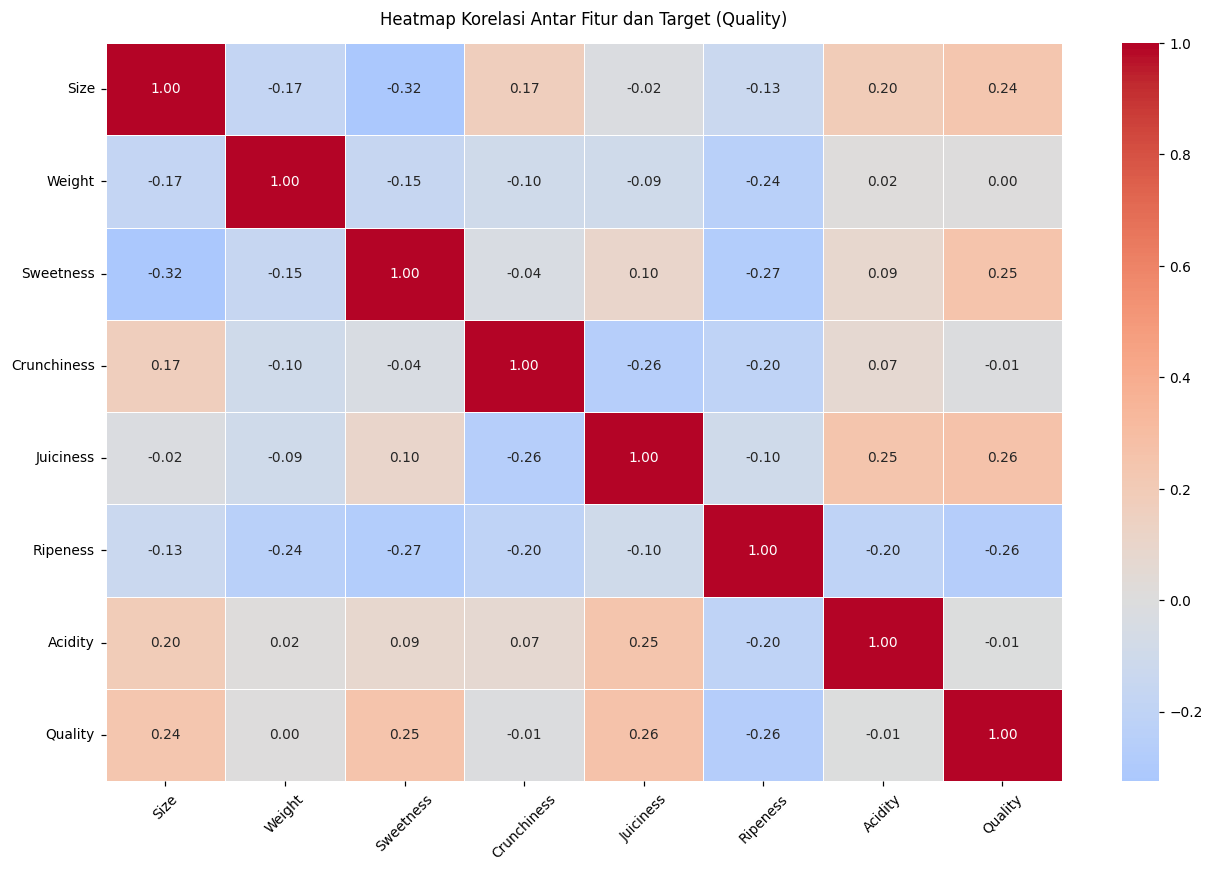


Korelasi Fitur dengan Quality:
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64


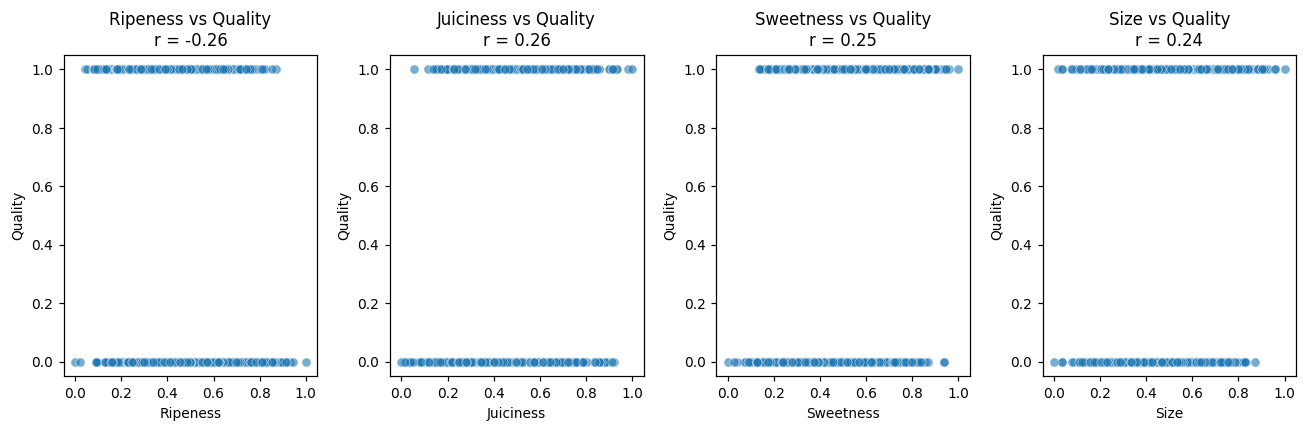

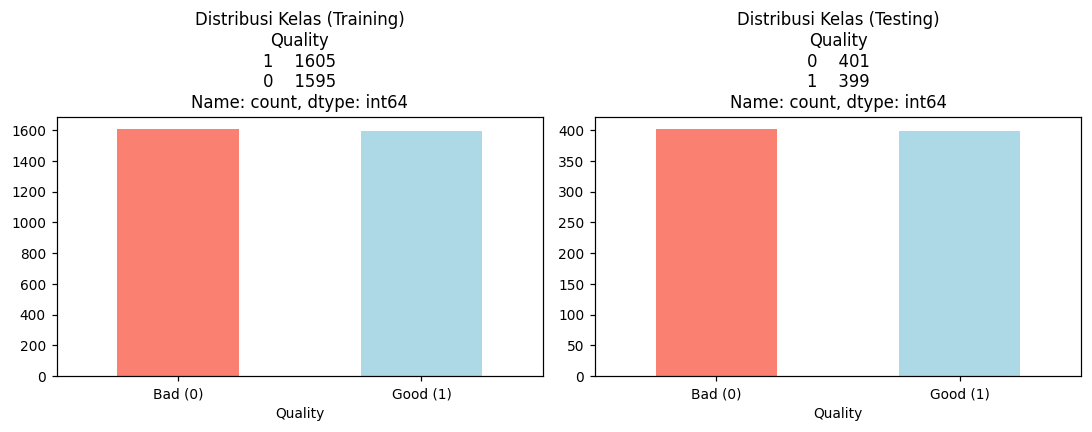

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Load dan Preprocessing Data
df = pd.read_csv('apple_quality.csv')

# Hapus kolom tidak penting
df = df.drop(columns=['A_id'])

# Konversi Quality ke numerik
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

# Handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())

# Pisahkan fitur dan label
X = df.drop(columns=['Quality'])
y = df['Quality']

# 2. MinMax Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. Visualisasi Before-After Scaling
plt.figure(figsize=(15, 6))

# Before Scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Data Sebelum Scaling', pad=12)
plt.xticks(rotation=45)

# After Scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled)
plt.title('Data Sesudah MinMax Scaling (0-1)', pad=12)
plt.xticks(rotation=45)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# 5. Visualisasi Korelasi Fitur
plt.figure(figsize=(12, 8))

# Hitung korelasi
corr_matrix = pd.concat([X_scaled, y], axis=1).corr()

# Heatmap korelasi
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, linewidths=0.5, annot_kws={"size": 9})
plt.title('Heatmap Korelasi Antar Fitur dan Target (Quality)', pad=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Korelasi dengan Target (Quality)
quality_corr = corr_matrix['Quality'].sort_values(ascending=False)[1:]
print("\nKorelasi Fitur dengan Quality:")
print(quality_corr)

# 7. Visualisasi Korelasi Teratas
top_features = quality_corr.abs().sort_values(ascending=False).index[:4]

plt.figure(figsize=(12, 4))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=pd.concat([X_scaled, y], axis=1), 
                   x=feature, y='Quality', alpha=0.6)
    plt.title(f'{feature} vs Quality\nr = {quality_corr[feature]:.2f}')
plt.tight_layout()
plt.show()

# 8. Distribusi Train-Test
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Kelas (Training)\n' + str(y_train.value_counts()))
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Distribusi Kelas (Testing)\n' + str(y_test.value_counts()))
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.tight_layout()
plt.show()